# Thiết lập môi trường và dataset

In [37]:
#import library
import numpy as np
import pandas as pd

In [38]:
data = pd.read_csv("spam_SMS.csv",encoding='latin1')
data.head()

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Tiền xử lý dữ liệu

In [39]:
# Thay đổi tên nhãn "ham" -> 0, "spam" -> 1
#data['class'] = data['class'].replace(['ham','spam'],[0,1])
#data.head()

In [40]:
data.shape

(5574, 2)

In [41]:
y = data['class'].values
X_text = data['content'].values 
print(X_text.shape)
print(y.shape)

(5574,)
(5574,)


In [42]:
# Lowercase the alphabets
data['content'] = data['content'].str.lower()
data.head()

,class,content
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Loại bỏ stopwords
sw = stopwords.words("english")

# count_vect = CountVectorizer(stop_words="english")
count_vect = CountVectorizer(sw)

# Chuyển đổi định dãng text thành vector
tcv = count_vect.fit_transform(X_text)


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Loại bỏ stopwords theo công thức TF-IDF
vectorizer = TfidfVectorizer(stop_words=sw,lowercase=True)

# Chuyển đổi định dãng text thành vector
X = vectorizer.fit_transform(X_text).toarray()

print(X.shape)
print(y.shape)

(5574, 8577)
(5574,)


In [45]:
# Chia bộ dataset thành training set và testing set
from sklearn.model_selection import train_test_split

# Training set / Testing set : 70% / 30%
# random_state: đảm bảo mỗi lần split đều ra output giống nhau

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
print("X_train lenght:",len(X_train))
print("X_test lenght:",len(X_test))
print("y_train lenght:",len(y_train))
print("y_test lenght:",len(y_test))

X_train lenght: 3901
X_test lenght: 1673
y_train lenght: 3901
y_test lenght: 1673


## Visualize classification report

In [46]:
# Plot classification report
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Classes')
    plt.xlabel('Types of Accuracy')
    plt.tight_layout()

## Logistic Regression

Accuracy score 0.958756724447101


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.99      0.70      0.82       225

    accuracy                           0.96      1673
   macro avg       0.97      0.85      0.90      1673
weighted avg       0.96      0.96      0.96      1673



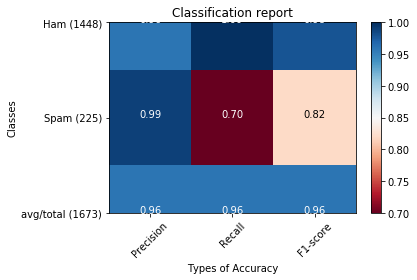

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
print("Accuracy score",accuracy_score(y_test,pred))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

def main():
    sampleClassificationReport = """precision    recall  f1-score   support
          Ham       0.96      1.00      0.98      1448
          Spam      0.99      0.70      0.82       225
        avg / total       0.96      0.96      0.96      1673"""

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()

if __name__ == '__main__':
    main()

In [48]:
# Predict class example
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(tcv, data['class'])

sentence = input("Your test sentence: ")
print("Predicted class:",classifier.predict(count_vect.transform([sentence]))[0])

Your test sentence: New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today! From ONLY å£1. www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18 TXTAUCTION.
Predicted class: spam


## Gaussian Naive Bayes 

Accuracy score 0.9025702331141662


              precision    recall  f1-score   support

         ham       0.98      0.91      0.94      1448
        spam       0.59      0.88      0.71       225

    accuracy                           0.90      1673
   macro avg       0.79      0.89      0.82      1673
weighted avg       0.93      0.90      0.91      1673



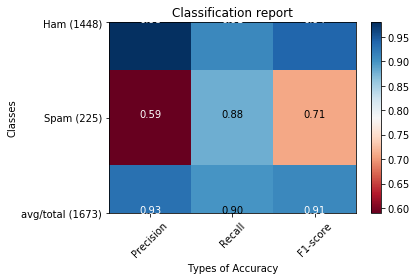

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
print("Accuracy score",accuracy_score(y_test,pred))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))


def main():

    sampleClassificationReport = """precision    recall  f1-score   support

          Ham       0.98      0.91      0.94      1448
          Spam      0.59      0.88      0.71       225
        avg / total       0.93      0.90      0.91      1673"""

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()

if __name__ == '__main__':
    main()

## Multinomial Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
print("Accuracy score",accuracy_score(y_test,pred))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

Accuracy score 0.9677226539151226


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.76      0.86       225

    accuracy                           0.97      1673
   macro avg       0.98      0.88      0.92      1673
weighted avg       0.97      0.97      0.97      1673



In [51]:
# Predict class example
classifier = MultinomialNB()
classifier.fit(tcv, data['class'])

sentence = input("Your test sentence: ")
print("Predicted class:",classifier.predict(count_vect.transform([sentence]))[0])

Your test sentence: New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today! From ONLY å£1. www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18 TXTAUCTION.
Predicted class: spam


# Bernoulli Naive Bayes

In [52]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
print("Accuracy score",accuracy_score(y_test,pred))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

Accuracy score 0.976688583383144


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.97      0.85      0.91       225

    accuracy                           0.98      1673
   macro avg       0.98      0.92      0.95      1673
weighted avg       0.98      0.98      0.98      1673



In [53]:
# Predict class example
classifier = BernoulliNB()
classifier.fit(tcv, data['class'])

sentence = input("Your test sentence: ")
print("Predicted class:",classifier.predict(count_vect.transform([sentence]))[0])

Your test sentence: New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today! From ONLY å£1. www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18 TXTAUCTION.
Predicted class: spam


## Decision tree

Accuracy score 0.9742976688583384


              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1448
        spam       0.90      0.91      0.91       225

    accuracy                           0.97      1673
   macro avg       0.94      0.95      0.95      1673
weighted avg       0.97      0.97      0.97      1673



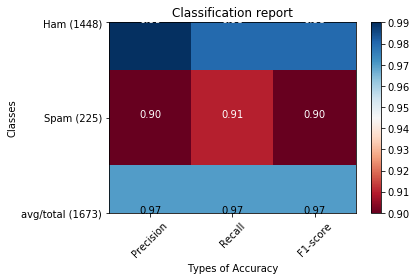

In [54]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
print("Accuracy score",accuracy_score(y_test,pred))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

def main():

    sampleClassificationReport = """precision    recall  f1-score   support

          Ham       0.99      0.98      0.98      1448
          Spam       0.90      0.91      0.90       225
        avg / total       0.97      0.97      0.97      1673"""

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()

if __name__ == '__main__':
    main()

In [55]:
# Predict class example
classifier = tree.DecisionTreeClassifier()
classifier.fit(tcv, data['class'])

sentence = input("Your test sentence: ")
print("Predicted class:",classifier.predict(count_vect.transform([sentence]))[0])

Your test sentence: New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today! From ONLY å£1. www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18 TXTAUCTION.
Predicted class: spam


## Support Vectot Machine (SVM)

Accuracy score 0.9557680812910938


              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1448
        spam       0.99      0.68      0.80       225

    accuracy                           0.96      1673
   macro avg       0.97      0.84      0.89      1673
weighted avg       0.96      0.96      0.95      1673



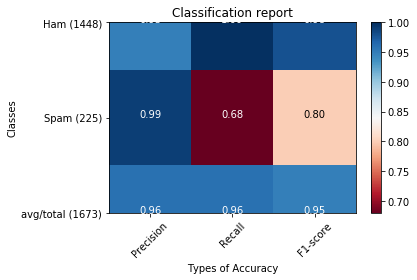

In [56]:
from sklearn.svm import SVC
classifier = SVC(gamma=0.1,C=1,kernel='rbf')
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
print("Accuracy score",accuracy_score(y_test,pred))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

def main():

    sampleClassificationReport = """precision    recall  f1-score   support

          Ham       0.95      1.00      0.98      1448
          Spam       0.99      0.68      0.80       225
        avg / total       0.96      0.96      0.95      1673"""

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()

if __name__ == '__main__':
    main()

In [57]:
# Predict class example
classifier = SVC(gamma=0.1,C=1,kernel='rbf')
classifier.fit(tcv, data['class'])

sentence = input("Your test sentence: ")
print("Predicted class:",classifier.predict(count_vect.transform([sentence]))[0])

Your test sentence: New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today! From ONLY å£1. www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18 TXTAUCTION.
Predicted class: spam
